Data description
SalePrice – the property’s sale price in dollars. This is the target variable that we are trying to predict.

MSSubClass: The building class.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet. Street: Type of road access.

Alley: Type of alley access.

LotShape: General shape of property.

LandContour: Flatness of the property.

LotConfig: Lot configuration.

LandSlope: Slope of property. Neighborhood: Physical locations within Ames city limits.

Condition1: Proximity to main road or railroad.

HouseStyle: Style of dwelling.

OverallQual: Overall material and finish quality.

OverallCond: Overall condition rating.

YearBuilt: Original construction date.

### EDA

In [2]:
#Core Modules
import pandas as pd
import numpy as np

#Basic modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
housing = pd.read_csv('./train.csv')

In [4]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
housing.shape

(1460, 81)

In [6]:
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing = housing.drop("Id", axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

We have 37 numerical attributes, 3 float64 and 34 int64, and 43 categorical columns.

In [8]:
#summary of numerical variables with upto 2 decimals
housing.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [9]:
#sumamry of categorical varuables
housing.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


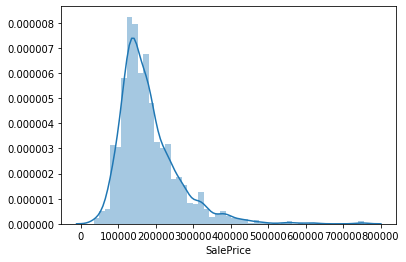

In [10]:
#distribution plot for SalePrice
sns.distplot(housing['SalePrice']);

We have a skewed distribution.
 Applying a log transformation means to simply take the log of the skewed variable to improve the fit by altering the scale and making the variable more normally distributed.

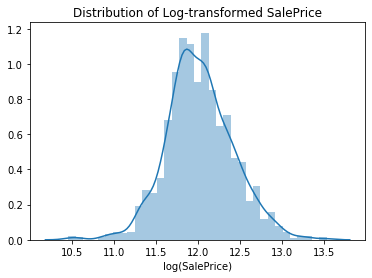

In [11]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

log-transformed variable is more normally distributed and we have managed to reduce the skew.

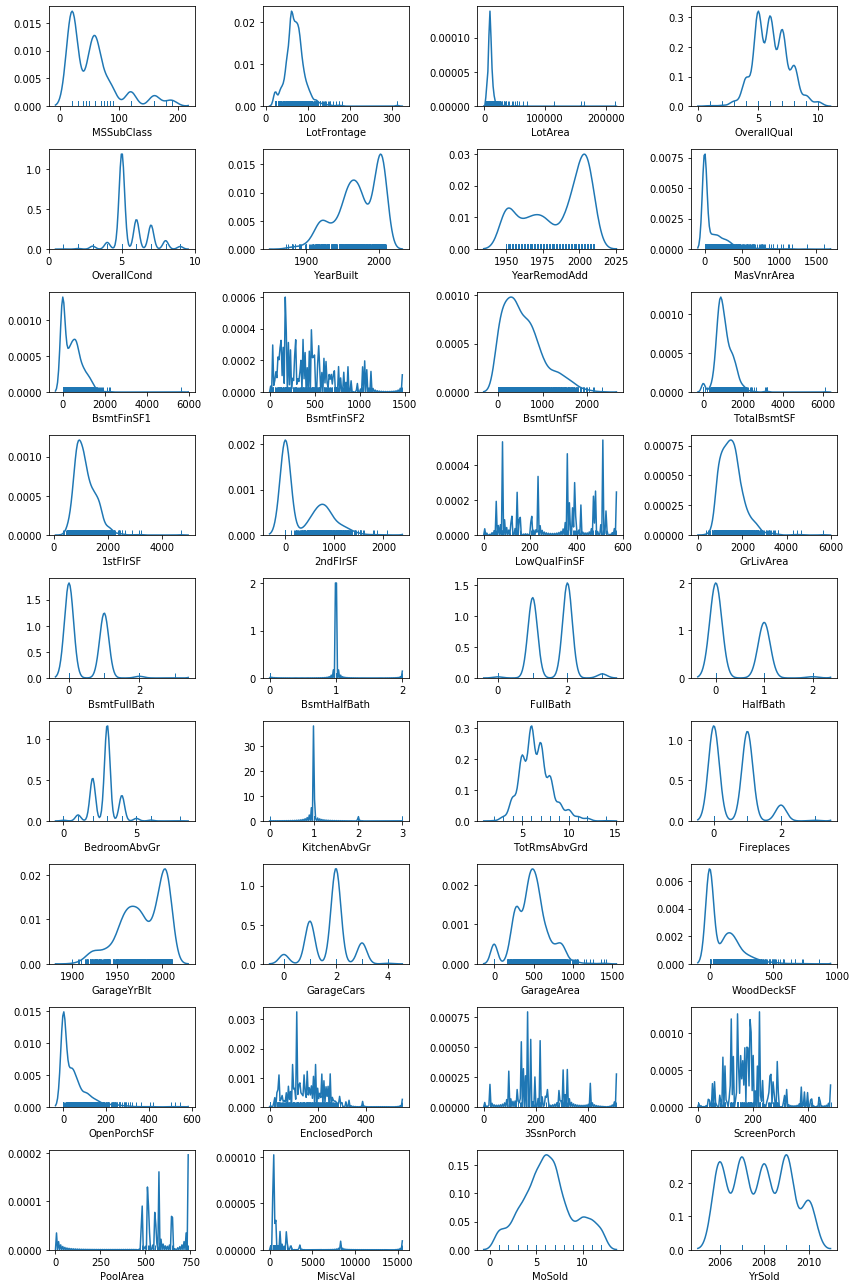

In [12]:
#distribution of numerical variables
num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

Becuase the distributions and scales for the different variables are very varying, we need to do feature scaling before modeling
Outliers

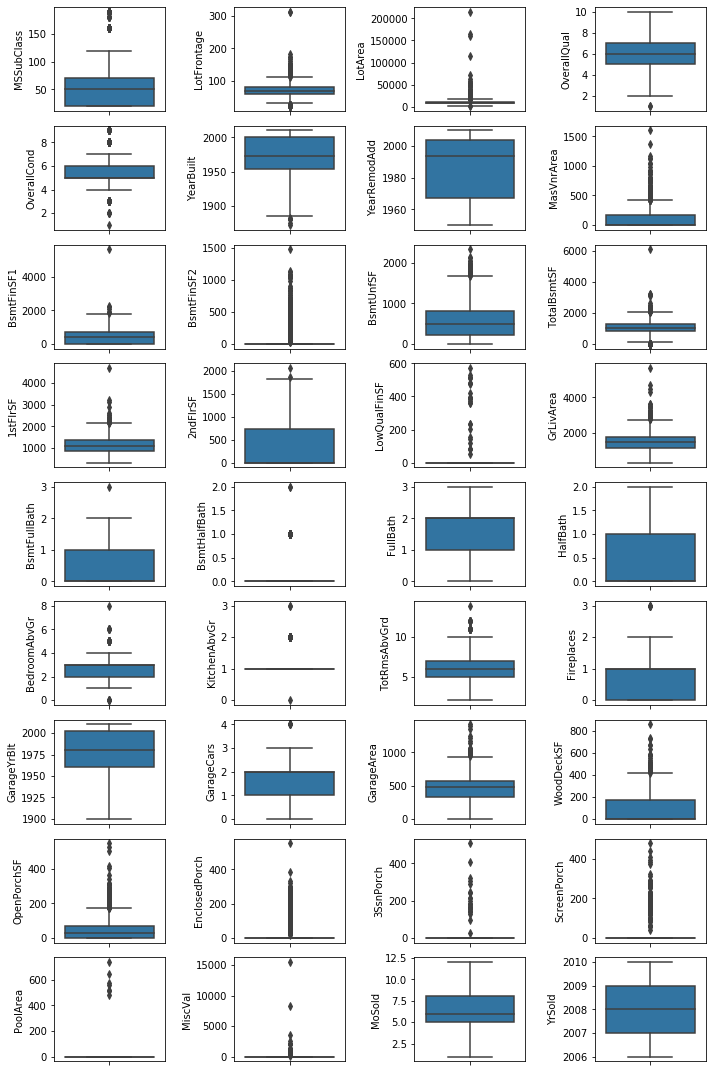

In [13]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

We can see that LotFrontage values above 200 and LotArea above 150000 can be marked as outliers. However, instead of relying on our own “visual sense” to spot patterns and define the range for outliers, when doing data cleaning, we will use the knowledge of percentiles to be more accurate.

### data preprocessing

In [15]:
#Missing values
housing.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

From the results above we can assume that PoolQC to Bsmt attributes are missing for the houses that do not have these facilities (houses without pools, basements, garage etc.). Therefore, the missing values could be filled in with “None”. MasVnrType and MasVnrArea both have 8 missing values, likely houses without masonry veneer.

Approach:
1. replace values for categorical attributes with None.
2. For LotFrontage, compute the median LotFrontage for all the houses in the same neighborhood, instead of the plain median for the entire column, and use that to impute on a neighborhood by neighborhood basis.
3. replace missing values for most of the numerical columns with zero and one with the mode.
4. drop one non-interesting column, Utilities.

In [17]:
#Imputing Missing Values
housing_processed = housing

#Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

#Replace missing values for categorical columns with None
for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")
    
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))    

#Garage: GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))
    
#MasVnrArea : replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

#Use the mode value 
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

#There is no need of Utilities so let's just drop this column
housing_processed = housing_processed.drop(['Utilities'], axis=1)

#Get the count again to verify that we do not have any more missing values
housing_processed.isnull().apply(sum).max()

0

In [18]:
#remove houses where we have some attribute that is above the 0.999 quantile, highly abnormal datapoint
num_attributes = housing_processed.select_dtypes(exclude='object')

high_quant = housing_processed.quantile(.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i]>high_quant[i]].index)

housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1422 non-null int64
MSZoning         1422 non-null object
LotFrontage      1422 non-null float64
LotArea          1422 non-null int64
Street           1422 non-null object
Alley            1422 non-null object
LotShape         1422 non-null object
LandContour      1422 non-null object
LotConfig        1422 non-null object
LandSlope        1422 non-null object
Neighborhood     1422 non-null object
Condition1       1422 non-null object
Condition2       1422 non-null object
BldgType         1422 non-null object
HouseStyle       1422 non-null object
OverallQual      1422 non-null int64
OverallCond      1422 non-null int64
YearBuilt        1422 non-null int64
YearRemodAdd     1422 non-null int64
RoofStyle        1422 non-null object
RoofMatl         1422 non-null object
Exterior1st      1422 non-null object
Exterior2nd      1422 non-null object
MasVnrType       1422 no

In [19]:
#Remove highly correlated features
#Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis=1)

In [20]:
#Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot

<1422x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 99540 stored elements in Compressed Sparse Row format>

### feature scaling

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Separate features and target variable
housing_X = housing_processed.drop("SalePrice", axis=1)
housing_y = housing_processed["SalePrice"].copy()

#Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

#Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [22]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


#Description before applying transforms
print(housing_y.describe())

#Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

#Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

#Description before applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count      1422.000000
mean     178405.042897
std       74506.926127
min       35311.000000
25%      129600.000000
50%      161500.000000
75%      211750.000000
max      611657.000000
Name: SalePrice, dtype: float64
count    1422.000000
mean       12.014792
std         0.389594
min        10.471950
25%        11.772207
50%        11.992260
75%        12.263160
max        13.323927
Name: SalePrice, dtype: float64


<1422x281 sparse matrix of type '<class 'numpy.float64'>'
	with 98118 stored elements in Compressed Sparse Row format>

### model

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

In [24]:
#Linear regression model
from sklearn.linear_model import LinearRegression

#Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 89.59107994081549


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost

In [30]:
#Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

#Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

#Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

In [31]:
#Decision Trees
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

In [32]:
#Random Forest
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score


In [33]:
#Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

In [35]:
#Performance measures in sorted order
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
LinearRegression    24637.0
GradientBoosting    27212.0
RandomForest        31491.0
DecisionTree        37872.0
dtype: float64

In [36]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
LinearRegression    89.591
GradientBoosting    89.567
RandomForest        84.796
DecisionTree        72.805
dtype: float64

The simplest model, Linear Regression, seems to be performing the best, with predicted prices that are off by about 24K. 

### evaluation

In [38]:
from sklearn.model_selection import cross_val_score

#Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(linear_rmse_scores)

Scores: [0.11254073 0.13883272 0.10564024 0.12889019 0.10899275 0.11501344
 0.10957032 0.11747953 0.13342404 0.11532405]
Mean: 0.11857080069370332
Standard deviation: 0.010669349027465956


### Grid search

In [39]:
from sklearn.model_selection import GridSearchCV

#Define the parameters for exploration
param_grid = [
    {'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
  ]

#The model for which we are finding params values
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]}, {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [40]:
#Best values
grid_search.best_params_

#Model with best values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

### Evaluate Using the Fine-Tuned Model

In [42]:
rf_model_final = RandomForestRegressor(bootstrap=False,max_features=50, n_estimators=150, random_state=5)

rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_test)

rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_test))
np.sqrt(rf_final_val_rmse)

28801.819287572634

In [43]:
rf_model_final.score(X_test, y_test)*100

87.81704897477596

The accuracy has gone up from about 84.8 to 87.8 while the RMSE has decreased from 31491 to 28801.